<a href="https://colab.research.google.com/github/RannierAmeida/PCC104/blob/main/Scheneider.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Bibletecas
---



In [ ]:
! pip install mip

In [ ]:
# !pip install gurobipy
# !pip uninstall gurobipy

In [ ]:
#Google Drive
from google.colab import drive
import os

#MIP
from mip import *

#Math
import itertools
import numpy as np

#Grafos
import networkx as nx

#Graficos
import matplotlib.pyplot as plt

#Tabulação
from tabulate import tabulate

#Tempo
import time

#Gurobi
# import gurobipy as gp
# from gurobipy import GRB

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Funções

In [ ]:
# Função para imprimir dados formatados com cabeçalhos
def imprimir_dados(cabecalhos, dados):
    # Imprimir o cabeçalho
    print("\t".join(f"{cabecalho:<10}" for cabecalho in cabecalhos))
    # Imprimir os dados
    for dado in dados:
        linha_formatada = "\t".join(f"{dado[cabecalho]:<10}" for cabecalho in cabecalhos)
        print(linha_formatada)

In [ ]:
def ler_arquivo_txt(caminho_arquivo):
    dados = []
    parametros = {}
    quebra_parametros = False

    try:
        with open(caminho_arquivo, 'r') as arquivo:
            # Ignorar a primeira linha, que contém os cabeçalhos
            next(arquivo)
            for linha in arquivo:
                #Verifica se linha tem valores, se não tiver para código

                if not linha.strip():
                  quebra_parametros = True

                  continue
                elif quebra_parametros:
                  Parametro = linha[0]
                  Valor = linha.split('/')[1]
                  parametros.update({ Parametro: float(Valor) })
                elif  linha.strip() and not quebra_parametros:
                  linha = linha.split()
                  item = {
                    'StringID': linha[0],

                    'Type': linha[1],
                    'x': float(linha[2]),
                    'y': float(linha[3]),
                    'demand': float(linha[4]),
                    'ReadyTime': float(linha[5]),
                    'DueDate': float(linha[6]),
                    'ServiceTime': float(linha[7])
                  }
                  dados.append(item)

                  try:
                    item['priority'] = int(linha[8])
                  except IndexError:
                    item['priority'] = 0
                  except ValueError:
                    item['priority'] = 0
                    dados.append(item)
                  except FileNotFoundError:
                    print(f"Arquivo não encontrado: {caminho_arquivo}")
    except Exception as e:
      print(f"Erro ao ler o arquivo: {e}")
    return dados, parametros

#Teste
# a = ler_arquivo_txt('/content/drive/MyDrive/Mestrado/Dissertação - Rannier Almeida/Instancias/Zhang (2024)/50/C50_D5_R2.txt')

In [ ]:
# Encontrar todos os caminhos de D0_0 para qualquer nó
def find_all_paths(graph, start, end, path=[]):
    path = path + [start]

    if start == end:
        return [path]

    if start not in graph:
        return []

    paths = []
    for node in graph[start]:
        if node not in path:
            new_paths = find_all_paths(graph, node, end, path)
            for p in new_paths:
                paths.append(p)

    return paths

# Imprimir todos os caminhos
# caminhos = find_all_paths(G_plot, 'D0_0', 'D0_1')

# Input

In [ ]:
# Monta o Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from ast import excepthandler
#Cabeçalho
print("Nome: Rannier Salles de Almeida")
print("Curso: Mestrado de Ciência da Computação - Otimização")
print("Universidade: Universidade Federal de Ouro Preto (UFOP)")
print("Orientador: Puca Huachi")
print("Objetivo: Implementação Zhang MIP")
print("Versão:")
print("_" * 60)



# Caminhos das pastas onde estão os arquivos CSV
caminho_pasta = [
     '/content/drive/MyDrive/Mestrado/Dissertação - Rannier Almeida/Instancias/Scheneider (2014)/',
    #  '/content/drive/MyDrive/Mestrado/Dissertação - Rannier Almeida/Instancias/Zhang (2024)/50/',
    # '/content/drive/MyDrive/Mestrado/Dissertação - Rannier Almeida/Instancias/Zhang (2024)/75/',
    # '/content/drive/MyDrive/Mestrado/Dissertação - Rannier Almeida/Instancias/Zhang (2024)/125/',
    # '/content/drive/MyDrive/Mestrado/Dissertação - Rannier Almeida/Instancias/Zhang (2024)/100/'
]

arquivos = []
# Print Menu
indice = 0
print("\nEscolha a sua Instância:\n")

# Lista todos os arquivos na pasta
for caminho in caminho_pasta:
    for arquivo in os.listdir(caminho):
        if arquivo.endswith('.txt'):
            # Construir o URL completo
            url_arquivo = os.path.join(caminho, arquivo)
            arquivos.append((arquivo, url_arquivo))
            print(f"Instância {indice}: {arquivo}")
            indice += 1

# Leitura do arquivo
leitura_valida = False

while not leitura_valida:
  try:
      #indice_instancia = 79
      indice_instancia = int(input("Digite o índice da instância desejada: "))
      nome_arquivo, url_arquivo = arquivos[indice_instancia]
      print(f"Você selecionou a instância {nome_arquivo}. URL: {url_arquivo}")
      print(url_arquivo)
      dados, parametros = ler_arquivo_txt(url_arquivo)
      leitura_valida = True
  except (ValueError, IndexError):
      print("Índice inválido")

Nome: Rannier Salles de Almeida
Curso: Mestrado de Ciência da Computação - Otimização
Universidade: Universidade Federal de Ouro Preto (UFOP)
Orientador: Puca Huachi
Objetivo: Implementação Zhang MIP
Versão:
____________________________________________________________

Escolha a sua Instância:

Instância 0: c106_21.txt
Instância 1: c109_21.txt
Instância 2: c103_21.txt
Instância 3: c108_21.txt
Instância 4: c102_21.txt
Instância 5: c101C10.txt
Instância 6: c202C10.txt
Instância 7: c106C15.txt
Instância 8: c104_21.txt
Instância 9: c104C10.txt
Instância 10: c107_21.txt
Instância 11: c201_21.txt
Instância 12: c202_21.txt
Instância 13: c103C15.txt
Instância 14: c103C5.txt
Instância 15: c105_21.txt
Instância 16: c206C5.txt
Instância 17: r101_21.txt
Instância 18: c205C10.txt
Instância 19: c206_21.txt
Instância 20: r102C15.txt
Instância 21: c208_21.txt
Instância 22: c203_21.txt
Instância 23: r102C10.txt
Instância 24: r105C15.txt
Instância 25: r103_21.txt
Instância 26: r102_21.txt
Instância 27: 

In [ ]:
# Define os cabeçalhos
cabecalhos = ['StringID', 'x', 'y', 'demand', 'ReadyTime', 'DueDate', 'ServiceTime', 'priority']

# Print the file name at the top
print(f"Instância: {nome_arquivo}\n")

# Separate the data by type
depositos = [dado for dado in dados if dado['Type'] == 'd']
estacoes_recarga = [dado for dado in dados if dado['Type'] == 'f' and dado['StringID'] != 'S0']
clientes = [dado for dado in dados if dado['Type'] == 'c']

# Print the data separated by type
print("Depósitos:")
imprimir_dados(cabecalhos, depositos)

print("\nEstações de recarga:")
imprimir_dados(cabecalhos, estacoes_recarga)

print("\nClientes:")
imprimir_dados(cabecalhos, clientes)


Instância: c103C5.txt

Depósitos:
StringID  	x         	y         	demand    	ReadyTime 	DueDate   	ServiceTime	priority  
D0        	40.0      	50.0      	0.0       	0.0       	1236.0    	0.0       	0         

Estações de recarga:
StringID  	x         	y         	demand    	ReadyTime 	DueDate   	ServiceTime	priority  
S15       	39.0      	26.0      	0.0       	0.0       	1236.0    	0.0       	0         

Clientes:
StringID  	x         	y         	demand    	ReadyTime 	DueDate   	ServiceTime	priority  
C20       	30.0      	50.0      	10.0      	0.0       	1136.0    	90.0      	0         
C98       	58.0      	75.0      	20.0      	0.0       	1115.0    	90.0      	0         
C65       	48.0      	40.0      	10.0      	67.0      	139.0     	90.0      	0         
C57       	40.0      	15.0      	40.0      	989.0     	1063.0    	90.0      	0         
C24       	25.0      	50.0      	10.0      	0.0       	1131.0    	90.0      	0         


# Scheneider


In [ ]:
# Conjuntos
N = [{'id': cliente['StringID'], 'x': cliente['x'], 'ServiceTime':cliente['ServiceTime'], 'DueDate':cliente['DueDate'], 'ReadyTime':cliente['ReadyTime'],
      'y': cliente['y'], 'demanda': cliente['demand'], 'tipo': 'c', 'cor_no': 'whitesmoke', 'pos': (cliente['x'], cliente['y'])} for cliente in clientes]
D_0 = [{'id': deposito['StringID'] + '_0', 'x': deposito['x'], 'ServiceTime':deposito['ServiceTime'],'DueDate':deposito['DueDate'], 'ReadyTime':deposito['ReadyTime'],
      'y': deposito['y'], 'demanda': deposito['demand'], 'tipo': 'd0', 'cor_no': 'plum', 'pos': (deposito['x'], deposito['y'])} for deposito in depositos]
D_1 = [{'id': deposito['StringID'] + '_1', 'x': deposito['x'], 'ServiceTime':deposito['ServiceTime'],'DueDate':deposito['DueDate'], 'ReadyTime':deposito['ReadyTime'],
      'y': deposito['y'], 'demanda': deposito['demand'], 'tipo': 'd1', 'cor_no': 'plum', 'pos': (deposito['x'], deposito['y'])} for deposito in depositos]
F = []

#Criterio de Estações
n_dummy_estações = 2
ni = 0
for i in N:
  if ni >= n_dummy_estações:
    break
  else:
    ni += 1
    print(i['id'])
    F.extend([{'id': estacao['StringID'] + '@' + str(ni), 'x': estacao['x'], 'ServiceTime':estacao['ServiceTime'],'DueDate':estacao['DueDate'], 'ReadyTime':estacao['ReadyTime'],
       'y': estacao['y'], 'demanda': estacao['demand'], 'tipo': 'f', 'cor_no': 'palegreen', 'pos': (estacao['x'], estacao['y'])} for estacao in estacoes_recarga])

 # Estações de recarga
# D_Dummy = []

F_linha = F
F_0_linha = F + D_0
V = N
V_linha = N + F_linha
V_0_linha = V_linha + D_0
V_N1_linha = V_linha + D_1
V_0_N1_linha = V_0_linha + D_1

#Parametros

C = parametros['C']  #Capacidade de carga
Q = parametros['Q']  #Capacidade bateria
h =  parametros['r']  #Taxa de consumo de bateria
g = parametros['g'] #Taxa de recarga de bateria
Vel = parametros['v']  #Velocidade de deslocamento
l0 = D_0[0]['DueDate'] #Horario maximo de retorno para deposito

#Teste
# print(D_0)
# print(D_1)

print('Q:', Q)
print('C: ',C)
print('h: ',h)
print('g: ',g)
print('v: ',Vel)
print('l0: ',l0, end = '\n\n')
# for i in N:
#   print(i['id'])
# for i in F:
#   print(i['id'])
for i in V_0_N1_linha:
  print(i['id'])

C20
C98
Q: 77.75
C:  200.0
h:  1.0
g:  3.47
v:  1.0
l0:  1236.0

C20
C98
C65
C57
C24
S15@1
S15@2
D0_0
D0_1


In [ ]:
# Grafo
G = nx.DiGraph()

# Adiciona vértices ao grafo
for vertice in V_0_N1_linha:
    G.add_node(vertice['id'], pos=vertice['pos'], cor_no=vertice['cor_no'], qi=vertice['demanda'], tipo=vertice['tipo'],
               e_i = vertice['ReadyTime'], # e_i Inicio do Serviço mais cedo no vertice
               l_i = vertice['DueDate'], # l_i Inicio do serviço mais tarde no vertice
               s_i = vertice['ServiceTime'], # s_i Service Time
              #  t_i = None, # t_i Variavel de decisão com tempo de chegada
              #  u_i = None, # u_i Varivael de decisão com carga restante no vertice i
              #  y_i = None, # y_i Variavel de decisão com bateria restante no vertice
               F =  vertice['tipo'] == 'f',
               F_0 =  vertice['tipo'] == 'f' or vertice['tipo'] == 'd0',
               V = vertice['tipo'] == 'c',
               V_0 = vertice['tipo'] == 'c' or vertice['tipo'] == 'd0',
               V_f = vertice['tipo'] == 'c' or vertice['tipo'] == 'f',
               V_0_f = vertice['tipo'] == 'c' or vertice['tipo'] == 'd0' or vertice['tipo'] == 'f',
               V_N1_f = vertice['tipo'] == 'c' or vertice['tipo'] == 'd1' or vertice['tipo'] == 'f',
               V_0_N1_f = vertice['tipo'] == 'c' or vertice['tipo'] == 'd0' or vertice['tipo'] == 'd1' or vertice['tipo'] == 'f',
               D_0 = vertice['tipo'] == 'd0',
               D_1 = vertice['tipo'] == 'd1'
               )
    # print(f"{vertice['id']} \t demanda: {G.nodes[vertice['id']]['qi']}")

# Conecta grafo
for i in G.nodes:
  if G.nodes[i]['V_0_f']:
    for j in G.nodes:
        if i != j and G.nodes[j]['V_N1_f'] == True:
            # Distancia de Manhattan
            # temp_dij = abs(G.nodes[i]['pos'][0] - G.nodes[j]['pos'][0]) + abs(G.nodes[i]['pos'][1] - G.nodes[j]['pos'][1])
            # Distancia Euclidiana
            temp_dij = np.sqrt((G.nodes[i]['pos'][0] - G.nodes[j]['pos'][0])**2 + (G.nodes[i]['pos'][1] - G.nodes[j]['pos'][1])**2)
            G.add_edge(i, j,
                       d_ij= temp_dij,
                       t_ij = temp_dij / Vel,
                      #  x_ij = 0,
                       Ativo = False ,
                       iV0f_jVN1 = G.nodes[i]['V_0_f'] == True and G.nodes[j]['V_N1_f'] == True)
  # xij se trajeto é utilizado ou não

# for i in G.nodes:
#   for j in G.nodes:
#     if G.has_edge(i,j) and G.nodes[i]['pos'] == G.nodes[j]['pos']:
#       G.edges[i,j]['d_ij'] = G.edges[i,j]['t_ij']
#       G.edges[i,j]['t_ij'] =


# Linear


**Modelo Schneider**

Duração: 0.056027889251708984 (s)


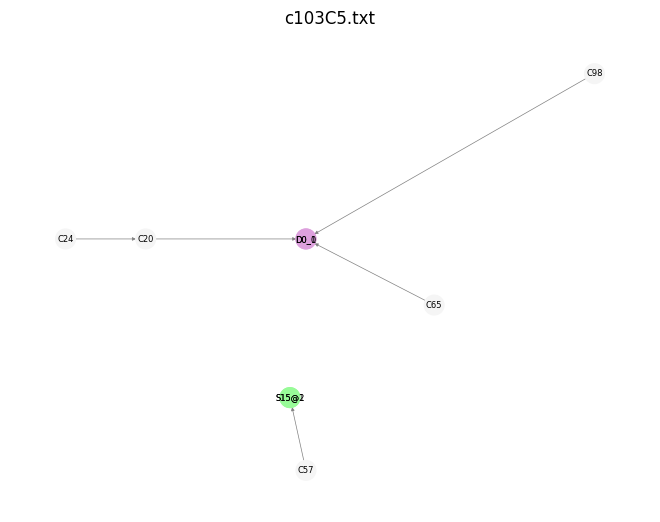

<Figure size 4000x4000 with 0 Axes>

-----------------------------------
Custo total: 69.65745309355168
Custo EV: 0
Custo s/ EV: 69.65745309355168
-----------------------------------



In [ ]:
#Modelo
M = Model('Schneider')

#Variaveis
x_ij_vars = {} # Dicionário para armazenar as variáveis x_ij
for i in G.nodes:
  if  G.nodes[i]['V_0_f'] == True:
    for j in G.nodes:
      if G.nodes[j]['V_N1_f'] == True and i != j:
        x_ij_vars[i, j] = M.add_var(var_type=BINARY, name=f"x_{i}_{j}")

t_i_vars = {} # Dicionário para armazenar as variáveis t_i
u_i_vars = {} # Dicionário para armazenar as variáveis u_i
y_i_vars = {} # Dicionário para armazenar as variáveis y_i

for v in G.nodes:
  if G.nodes[v]['V_0_N1_f'] == True:
    t_i_vars[v] = M.add_var(var_type=CONTINUOUS, name=f"t_{v}", lb=0, ub = l0 )
    u_i_vars[v] = M.add_var(var_type=CONTINUOUS, name=f"u_{v}", lb=0, ub = C)
    y_i_vars[v] = M.add_var(var_type=CONTINUOUS, name=f"y_{v}", lb=0, ub = Q)

#Restrições

  # #Equação 2 Schneider - Conectivade de clientes e depoisito final em todos os clientes
for i in G.nodes:
  if G.nodes[i]['V'] == True:
    M += xsum(x_ij_vars[i, j] for j in G.nodes if (i,j) in G.edges and G.nodes[j]['V_N1_f'] == True and i != j ) == 1

  # #Equação 3  - Estaçõe de recarga
for i in G.nodes:
  if G.nodes[i]['F'] == True:
    M += xsum(x_ij_vars[i, j] for j in G.nodes if (i,j) in G.edges and G.nodes[j]['V_N1_f'] == True and i != j) <= 1

  # #Equação 4 - Conservação do fluxo
for j in G.nodes:
  if G.nodes[j]['V_f'] == True:
    M +=  xsum(x_ij_vars[j, i] for i in G.nodes if G.nodes[i]['V_N1_f'] == True and i != j and G.has_edge(j,i))
    - xsum(x_ij_vars[i, j] for i in G.nodes if G.nodes[i]['V_0_f'] == True and i != j and G.has_edge(i,j)) == 0

  # #Equação 5 - Viabilidade temportal arcos saindo do cliente e deposito
for i in G.nodes:
  if G.nodes[i]['V_0'] == True:
    for j in G.nodes:
      if G.nodes[j]['V_N1_f'] == True and i != j and G.has_edge(i,j):
        M += t_i_vars[i] + ((G.edges[i, j]['t_ij'] +  G.nodes[i]['s_i'])* x_ij_vars[i, j]) - l0 * ( 1 - x_ij_vars[i, j])  <= t_i_vars[j]

  # #Equação 6 - Viabilidade temportal arcos estações de recarga
for i in G.nodes:
  if G.nodes[i]['F'] == True:
    for j in G.nodes:
      if G.nodes[j]['V_N1_f'] == True and i != j and G.has_edge(i,j):
        M += t_i_vars[i] + (G.edges[i, j]['t_ij'] * x_ij_vars[i, j]) + g * (Q - y_i_vars[i]) - (l0 + g*Q)*(1 - x_ij_vars[i, j]) <= t_i_vars[j]

  # #Equação 7 - Viabilidade temporal
for j in G.nodes:
  if G.nodes[j]['V_0_N1_f'] == True:
    M += G.nodes[j]['e_i']  <= t_i_vars[j]
    M += t_i_vars[j] <= G.nodes[j]['l_i']

  # # Equação 8 - Viabilidade de Carga
for i in G.nodes:
  if G.nodes[i]['V_0_f'] == True:
     for j in G.nodes:
       if G.nodes[j]['V_N1_f'] == True and i != j and G.has_edge(i,j) and i != j:
         M += u_i_vars[j]  >= 0
         M += u_i_vars[j]  <= u_i_vars[i] - G.nodes[i]['qi'] * x_ij_vars[i, j] + C * ( 1 - x_ij_vars[i, j])

  # Equação 9 - Não negatividade e restrição de limite de carga
for i in G.nodes:
  if G.nodes[i]['D_0'] == True:
    M += u_i_vars[i] >= 0
    M += u_i_vars[i] <= C
    # M += y_i_vars[i] == Q Teste Bateria maxima

  # Equação 10 - Viabilidade bateria
for i in G.nodes:
  if G.nodes[i]['V'] == True:
    for j in G.nodes:
      if G.nodes[j]['V_N1_f'] == True and G.has_edge(i,j) and i != j:
        M += y_i_vars[j] >= 0
        M += y_i_vars[j] <= y_i_vars[i] - (h * G.edges[i, j]['d_ij']) * x_ij_vars[i, j] + Q * (1 - x_ij_vars[i, j])

  #Equação 11 - Viabilidade bateria
for i in G.nodes:
  if G.nodes[i]['F_0'] == True:
    for j in G.nodes:
      if G.nodes[j]['V_N1_f'] == True and G.has_edge(i,j) and i != j:
        M += y_i_vars[j] >= 0
        M += y_i_vars[j] <= Q - (h * G.edges[i, j]['d_ij']) * x_ij_vars[i, j]

#Função Objetivo
M.objective = minimize(
    xsum(x_ij_vars[i, j] * G.edges[i, j]['d_ij'] for i,j in G.edges if G.has_edge(i,j) and G.nodes[i]['V_0_f'] == True and G.nodes[j]['V_N1_f'] and i != j) +
    xsum(x_ij_vars[i, j]*200 for i,j in G.edges if G.has_edge(i,j) and G.nodes[i]['D_0'] == True)
  )

#Otimiza
inicio = time.time()
M.optimize(max_seconds=300)
fim = time.time()
print(f'Duração: {fim - inicio} (s)')
foVeiculos = 0
for i in G.nodes:
  for j in G.nodes:
    if G.has_edge(i,j) and G.nodes[i]['D_0'] == True and x_ij_vars[i,j].x >= 1.0:
      foVeiculos += 100

# Define se arco esta sendo exibido
G_plot = G.copy()
for u, v in G_plot.edges:
    G_plot.edges[u, v]['xij'] = x_ij_vars[u, v].x
edges_to_remove = [(u, v) for u, v, d in G_plot.edges(data=True) if 'xij' in d and not d['xij']]
G_plot.remove_edges_from(edges_to_remove)
pos = nx.get_node_attributes(G_plot, 'pos')

# Desenha o grafo
cores_nos = [G_plot.nodes[n]['cor_no'] for n in G_plot.nodes]
nx.draw(G_plot, pos, with_labels=True, node_size=200, node_color=cores_nos, font_size=6, font_color='black', edge_color='gray', arrowsize=5, width = 0.5)
#Titulo do grafo
plt.title(f"{nome_arquivo}")
# Exibe o grafo
plt.figure(figsize=(40, 40))
plt.show()

print(35*'-')
print(f"Custo total: {M.objective_value}")
print(f"Custo EV: {foVeiculos}")
print(f'Custo s/ EV: {M.objective_value-foVeiculos}')
print(35*'-', end='\n\n')
caminhos = find_all_paths(G_plot, 'D0_0','D0_1')
for caminho in caminhos:
    print(caminho)

In [ ]:
for caminho in caminhos:
  tabulado = []
  distACM = 0
  for index, vertice in enumerate(caminho):
    try:
      distACM += G.edges[caminho[index-1], vertice]['d_ij']
      tabulado.append([caminho[index-1],caminho[index], t_i_vars[vertice].x,u_i_vars[vertice].x,G.nodes[caminho[index]]['qi'], y_i_vars[vertice].x, G.edges[caminho[index-1], vertice]['d_ij'], distACM] )
    except:
      print('\n\n')
    # print(f"x_{i}_{j}: {x_ij_vars[i, j].x}")
  tabulado = tabulate(tabulado, headers=['i','j', 'tempo chegada(j)', 'carga chegada(j)', 'demanda (j)', 'bateria chegada(j)', 'distancia percorrida(i,j)', 'distancia ACM'])
  print(tabulado, '\n')

In [ ]:
matriz_distancias = nx.to_numpy_array(G)
cabecalhos = list(G.nodes)

print("Matriz de Distâncias:")
print()
i = 0
for v in G.nodes():
  if(i==0):
    for c in cabecalhos:
      print(f'\t{c}', end='')
      i=1
    # print('\n')
  print(f'\n|{v}\t', end='')
  for j in G.nodes():
      if G.has_edge(v,j):
        print(f'|{G.edges[v,j]["d_ij"]:.1f}', end='\t')
      else:
         print('|X', end='\t')




Matriz de Distâncias:

	C20	C98	C65	C57	C24	S15@1	S15@2	D0_0	D0_1
|C20	|X	|37.5	|20.6	|36.4	|5.0	|25.6	|25.6	|X	|10.0	
|C98	|37.5	|X	|36.4	|62.6	|41.4	|52.6	|52.6	|X	|30.8	
|C65	|20.6	|36.4	|X	|26.2	|25.1	|16.6	|16.6	|X	|12.8	
|C57	|36.4	|62.6	|26.2	|X	|38.1	|11.0	|11.0	|X	|35.0	
|C24	|5.0	|41.4	|25.1	|38.1	|X	|27.8	|27.8	|X	|15.0	
|S15@1	|25.6	|52.6	|16.6	|11.0	|27.8	|X	|0.0	|X	|24.0	
|S15@2	|25.6	|52.6	|16.6	|11.0	|27.8	|0.0	|X	|X	|24.0	
|D0_0	|10.0	|30.8	|12.8	|35.0	|15.0	|24.0	|24.0	|X	|0.0	
|D0_1	|X	|X	|X	|X	|X	|X	|X	|X	|X	

# Heuristic

## Funções

In [ ]:
def calculaFO(Modelo):
  fo = 0
  for i in Modelo.nodes():
    for j in Modelo.nodes:
      if Modelo.has_edge(i,j) and Modelo.edges[i,j]['Ativo'] == 1:
        fo += G.edges[i,j]['d_ij']



In [ ]:
def verificaModelo(Modelo):
  somatorioTeste = 0
  ##2 Schneider - Conectivade de clientes e depoisito final em todos os clientes
  for i in Modelo.Nodes():
    for j in Modelo.Nodes:
      if Modelo.has_edge(i,j) and Modelo.edges[i,j]['Ativo'] == 1 and Modelo.node[i]['V'] == True and Modelo.node[j]['V_N1_f'] == True:
        somatorioTeste += 1
    if somatorioTeste != 1:
      return False
    somatorioTeste = 0

  #Equação 3  - Estaçõe de recarga
  for i in Modelo.nodes:
    if Modelo.nodes[i]['F'] == True:
      for j in Modelo.nodes:
        if Modelo.nodes[j]['V_N1_f'] == True and i != j and Modelo.edges[i,j]['Ativo'] == 1:
          somatorioTeste += 1
      if somatorioTeste > 1:
        return False

  # #Equação 4 - Conservação do fluxo
  for j in G.nodes:
    if G.nodes[j]['V_f'] == True:
      M +=  xsum(x_ij_vars[j, i] for i in G.nodes if G.nodes[i]['V_N1_f'] == True and i != j and G.has_edge(j,i))
      - xsum(x_ij_vars[i, j] for i in G.nodes if G.nodes[i]['V_0_f'] == True and i != j and G.has_edge(i,j)) == 0







# for i in G.nodes:
#   if G.nodes[i]['V'] == True:
#     M += xsum(x_ij_vars[i, j] for j in G.nodes if (i,j) in G.edges and G.nodes[j]['V_N1_f'] == True and i != j ) == 1


# Guloso